```
    _/    _/  _/_/_/  _/       Numerical Simulation Laboratory
   _/_/  _/ _/       _/       Physics Department
  _/  _/_/    _/    _/       Universita' degli Studi di Milano
 _/    _/       _/ _/       Prof. D.E. Galli
_/    _/  _/_/_/  _/_/_/_/ email: Davide.Galli@unimi.it
```

# Lesson 3

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.special import erf

In [2]:
def error(ave, ave2, n):
    if n == 0:
        return 0
    return np.sqrt((ave2 - ave*ave) / n)

def blocks_value(data):
    total = 0.
    total2 = 0.
    y = np.zeros((len(data), 2))
    for i in range(len(data)):
        total = total + data[i]
        total2 = total2 + data[i]*data[i]
        ave = total / (i+1)
        ave2 = total2 / (i+1)
        y[i, 0] = ave
        y[i, 1] = error(ave, ave2, i)
    return y

## Exercise 3.1

In this exercise we simulate plain vanilla option pricing using a Geometric Brownian Motion, as theorized by Black and Scholes.

We first calculate the expected call and put price using the analytical solution.

In [3]:
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / np.sqrt(2.)))

d1 = 1./ (sigma * np.sqrt(T)) * (np.log(S0 / K) + (r + (sigma**2) / 2.) * T)
d2 = d1 - sigma * np.sqrt(T)

call = S0 * N(d1) - K * np.exp(-r * T) * N(d2)
put = S0 *(N(d1) - 1.) - K * np.exp(-r * T) * (N(d2)-1.)

In [4]:
with open("data/3.1-info.dat") as file:
    N_blocks = int(file.readline())
    N_throws_per_block = int(file.readline())
    N_steps_per_throw = int(file.readline())

x = np.arange(N_blocks) * N_throws_per_block

### Call option

Then we simulate the call option price sampling directly the final asset price.

In [5]:
data = np.loadtxt("data/3.1-call-direct.dat")

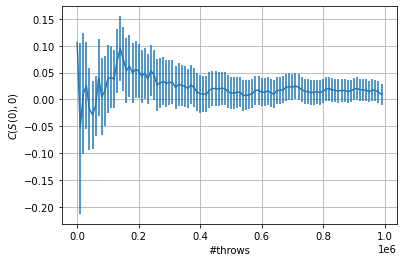

C(S(0), 0) = 0.009 ± 0.020


In [6]:
y = blocks_value(data[:])
plt.errorbar(x, y[:,0] - call, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$C(S(0), 0)$")
plt.grid(True)
plt.show()
print(f"C(S(0), 0) = {y[-1, 0] - call:.3f} ± {y[-1, 1]:.3f}")

The result is compatible with the expected price.

We now estimate the price using a discretized geometric random walk.

In [7]:
data = np.loadtxt("data/3.1-call-disc.dat")

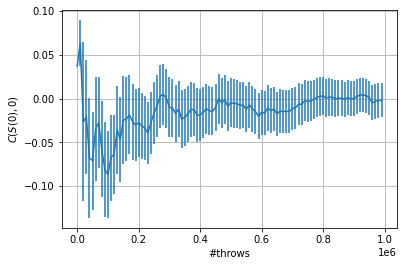

C(S(0), 0) = -0.002 ± 0.019


In [8]:
y = blocks_value(data[:])
plt.errorbar(x, y[:,0] - call, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$C(S(0), 0)$")
plt.grid(True)
plt.show()
print(f"C(S(0), 0) = {y[-1, 0] - call:.3f} ± {y[-1, 1]:.3f}")

The result is compatible with the expected price.

### Put option

In [9]:
data = np.loadtxt("data/3.1-put-direct.dat")

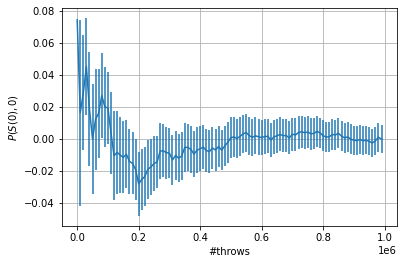

P(S(0), 0) = -0.000 ± 0.009


In [10]:
y = blocks_value(data[:])
plt.errorbar(x, y[:,0] - put, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$P(S(0), 0)$")
plt.grid(True)
plt.show()
print(f"P(S(0), 0) = {y[-1, 0] - put:.3f} ± {y[-1, 1]:.3f}")

The result is compatible with the expected price.

We now estimate the price using a discretized geometric random walk.

In [11]:
data = np.loadtxt("data/3.1-put-disc.dat")

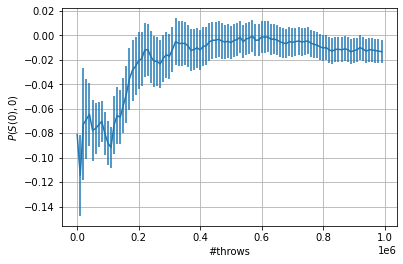

P(S(0), 0) = -0.013 ± 0.010


In [12]:
y = blocks_value(data[:])
plt.errorbar(x,y[:,0] - put, yerr=y[:,1])
plt.xlabel(r"#throws")
plt.ylabel(r"$P(S(0), 0)$")
plt.grid(True)
plt.show()
print(f"P(S(0), 0) = {y[-1, 0] - put:.3f} ± {y[-1, 1]:.3f}")

The result is about $1\sigma$ from the exected result.